In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
df.shape

(3677, 23)

In [6]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price', ylabel='Density'>

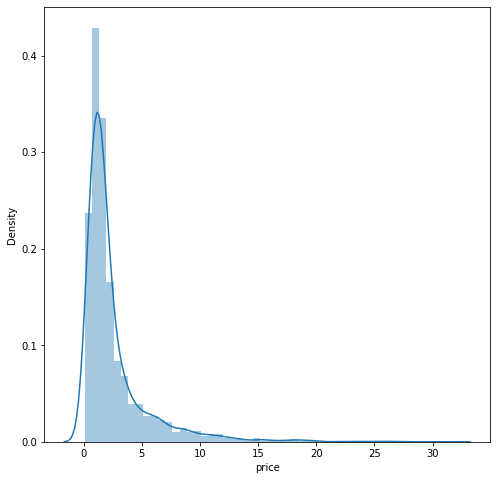

In [7]:
#Outliers on the basis of price column
plt.figure(figsize=(8,8))
sns.distplot(df['price'])

<AxesSubplot: xlabel='price'>

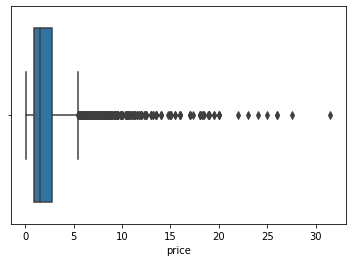

In [8]:
sns.boxplot(x=df['price'])

In [9]:
#calculate the IQR for the 'price' column:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1

#Define bounds for outliers
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

#Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

#Displaying the number of outliers and some statistics
num_outliers= outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [10]:
outliers.sort_values('price', ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2488,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2765,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
2667,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
711,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
2096,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


In [11]:
outliers.to_csv('outliers_price.csv')

In [12]:
#On the basis of price col we can say that there are some genuine outliers but there are some data errors as well.

## Price_Per_Sqft

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

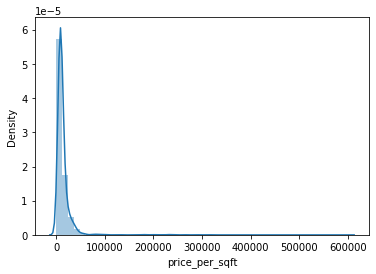

In [13]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot: xlabel='price_per_sqft'>

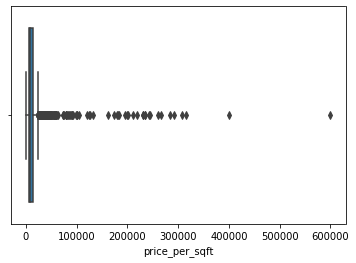

In [14]:
sns.boxplot(x=df['price_per_sqft'])

In [15]:
#Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3-Q1

#Define the bounds of outliers
lower_bound = Q1- 1.5*IQR
upper_bound = Q3+ 1.5*IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

#Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats


(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [16]:
outliers_sqft.sort_values('price_per_sqft', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.00,NaN,1,1,0,1,0,1,122
2850,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.00,NaN,1,1,0,0,0,1,114
2461,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.000000,0,0,0,0,0,0,0
2047,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.00,NaN,0,0,0,0,0,0,53
975,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.00,NaN,1,1,0,1,1,1,49
342,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,NaN,240.00,NaN,0,1,0,0,0,0,49
3449,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,NaN,300.00,NaN,1,1,0,1,0,0,21
2161,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,NaN,402.00,NaN,0,1,0,1,0,1,91
3519,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.00,NaN,0,0,0,0,0,2,7
2277,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.00,NaN,0,0,1,0,0,0,70


In [17]:
outliers_sqft.to_csv('outliers_per_sqft.csv')

In [18]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x<1000 else x)

<ipython-input-18-4ae4daa1a203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x: x*9 if x<1000 else x)


In [19]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

<ipython-input-19-f07934424e06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [20]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [21]:
df.update(outliers_sqft)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

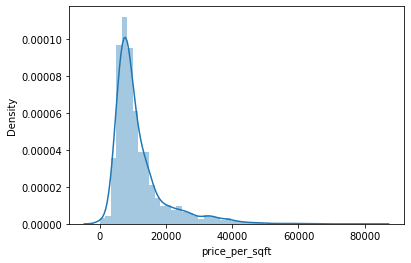

In [22]:
sns.distplot(df['price_per_sqft'])

<AxesSubplot: xlabel='price_per_sqft'>

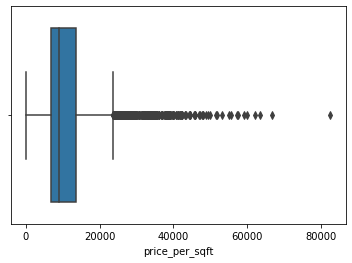

In [23]:
sns.boxplot(x=df['price_per_sqft'])

In [24]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
386,house,cloudnine cottages,sohna road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3.0,3.0,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4.0,4.0,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1.0,1.0,0.0,1.0,0.0,2.0,75.0
1200,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16.0,20.0,3+,4.0,East,New Property,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,153.0
1261,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16.0,16.0,3+,4.0,West,New Property,NaN,325.0,300.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
1349,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3.0,3.0,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1425,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,Undefined,NaN,140.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1640,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,160.0
1839,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4.0,4.0,3,2.0,North,Relatively New,NaN,250.0,200.0,1.0,1.0,1.0,1.0,0.0,1.0,103.0
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16.0,16.0,3+,4.0,North-West,New Property,NaN,400.0,350.0,1.0,1.0,1.0,1.0,0.0,2.0,72.0
2290,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12.0,12.0,3+,4.0,North,New Property,NaN,1600.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,99.0


In [25]:
df = df[df['price_per_sqft'] <= 50000]

In [26]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0


<AxesSubplot: xlabel='price_per_sqft'>

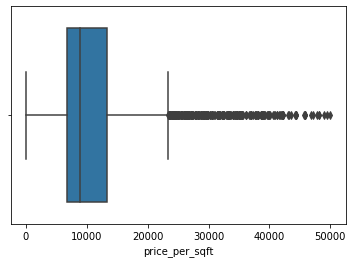

In [27]:
sns.boxplot(x=df['price_per_sqft'])

## Area

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='area', ylabel='Density'>

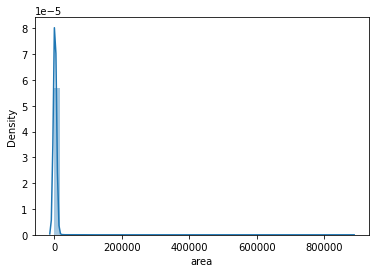

In [28]:
sns.distplot(df['area'])

<AxesSubplot: xlabel='area'>

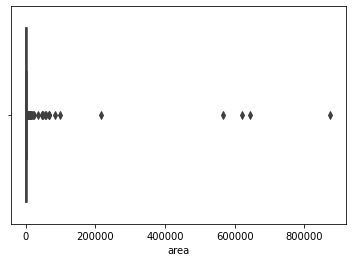

In [29]:
sns.boxplot(x=df['area'])

In [30]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [31]:
temp_area =df[df['area'] >100000]

In [32]:
temp_area

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514396.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,44.0
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569243.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1.0,0.0,0.0,0.0,1.0,0.0,65.0
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,NaN,2.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [33]:
temp_area.loc[1638,['area','carpet_area']] = '514'
temp_area.loc[1648,['area','built_up_area']] = '737'
temp_area.loc[1648,['carpet_area']] = '519.39'
temp_area.loc[2111,['area','carpet_area']] = '569'
temp_area.loc[2651,['area','built_up_area']] = '685'
temp_area.loc[2651,['carpet_area']] = '608'
temp_area.loc[3021,['area','super_built_up_area']] ='2159'
temp_area.loc[3021,['built_up_area']] ='1089'

In [34]:
temp_area['area']=temp_area['area'].astype(float)

<ipython-input-34-f260a2fd4371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_area['area']=temp_area['area'].astype(float)


In [35]:
temp_area['price_per_sqft'] = round((temp_area['price']*10000000)/temp_area['area'])

<ipython-input-35-fb6f726547d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_area['price_per_sqft'] = round((temp_area['price']*10000000)/temp_area['area'])


In [36]:
temp_area

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9922.0,514.0,Carpet area: 514396 (47788.95 sq.m.),2.0,2.0,1,3.0,North,New Property,NaN,NaN,514,0.0,0.0,0.0,0.0,0.0,0.0,44.0
1648,flat,hcbs sports ville,sohna road,0.35,4749.0,737.0,Built Up area: 737147 (68483.2 sq.m.),2.0,2.0,2,8.0,NaN,Relatively New,NaN,737,519.39,0.0,0.0,0.0,0.0,0.0,2.0,44.0
2111,flat,signature the roselia,sector 95,0.45,7909.0,569.0,Carpet area: 569243 (52884.41 sq.m.),2.0,2.0,2,2.0,South-West,New Property,NaN,NaN,569,0.0,0.0,0.0,0.0,0.0,0.0,76.0
2651,flat,ramsons kshitij,sector 95,0.31,4526.0,685.0,Carpet area: 607936 (56479.1 sq.m.),2.0,2.0,1,1.0,North-East,Relatively New,NaN,685,608,1.0,0.0,0.0,0.0,1.0,0.0,65.0
3021,house,independent,sector 50,5.00,23159.0,2159.0,Plot area 2(1011.71 sq.m.),6.0,5.0,3+,2.0,NaN,New Property,2159,1089,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [37]:
df.update(temp_area)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='area', ylabel='Density'>

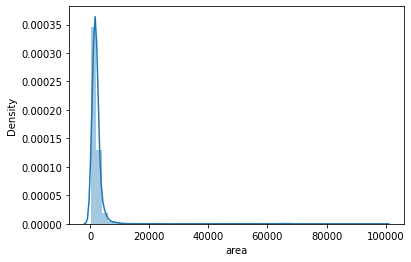

In [38]:
sns.distplot(df['area'])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='area'>

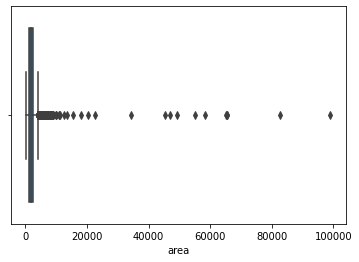

In [39]:
sns.boxplot(df['area'])

In [40]:
df[df['area'] >10000].sort_values('area', ascending=False)


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,1.0,60.0
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2.0,2.0,2,10.0,East,New Property,NaN,NaN,64529.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3.0,2.0,1,12.0,North,Relatively New,NaN,NaN,64412.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,NaN,58141.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2356,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2.0,2.0,1,13.0,South-West,Relatively New,NaN,NaN,54917.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0
115,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1.0,1.0,2,1.0,North-West,Relatively New,NaN,NaN,48811.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0.0,1.0,1.0,0.0,0.0,1.0,109.0
3649,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2.0,2.0,1,10.0,North-West,Relatively New,NaN,NaN,45966.0,0.0,0.0,0.0,0.0,1.0,0.0,33.0


In [90]:
df.loc[1796, ['carpet_area']] = 645.29
df.loc[1796, ['area','built_up_area']] = 731.49
df.loc[1123, ['carpet_area']] = 644.12
df.loc[1123, ['area','built_up_area']] = 644.12 +100
df.loc[2, ['carpet_area']] = 581.41
df.loc[2, ['area','built_up_area']] = 581.41+100
df.loc[2356,['carpet_area']] = 549.17
df.loc[2356,['area','built_up_area']] = 549.17+100
df.loc[115, ['area','carpet_area']]= 488.11
df.loc[115, ['sector']]= 'sector 36'
df.loc[3649, ['carpet_area']]=447.25
df.loc[3649, ['area','built_up_area']]= 447.25+88.96
df.loc[1879,['carpet_area']] = 321.2
df.loc[1879,['area','built_up_area']] = 321.2 + 28.74
df.loc[2267, ['carpet_area']] = 317.39
df.loc[2267, ['area', 'built_up_area']] = 317.39+42.68
df.loc[2503, ['carpet_area']] = 344.01
df.loc[2503, ['area', 'built_up_area']] = 344.01+55.04
df.loc[2131,['area','built_up_area']] = 1812
df.loc[3088, ['area','built_up_area']] =2160
df.loc[3444,['area','built_up_area']] = 1779
df.loc[2342, ['area','built_up_area']] = 4944


In [42]:
# 818,  1471
df.drop(index=[818,1471], inplace=True)

In [43]:
df[df['area']>10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10.0,6.0,2,3.0,South-East,Old Property,NaN,115.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,7.0,NaN
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10.0,10.0,3+,1.0,NaN,Undefined,NaN,NaN,7250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9.0,9.0,2,3.0,North-West,Relatively New,NaN,5800.0,5200.0,0.0,1.0,1.0,0.0,0.0,1.0,109.0,NaN
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9.0,9.0,3+,3.0,North-East,New Property,NaN,2660.0,2500.0,0.0,1.0,0.0,0.0,0.0,1.0,61.0,NaN
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8.0,7.0,3+,3.0,East,Moderately Old,NaN,2850.0,2250.0,1.0,1.0,0.0,1.0,1.0,1.0,123.0,NaN
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0,NaN
747,house,independent,sohna road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3.0,3.0,3+,2.0,West,Moderately Old,NaN,3500.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,49.0,NaN


In [44]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='area', ylabel='Density'>

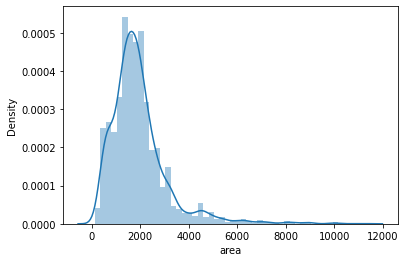

In [45]:
sns.distplot(df['area'])

<AxesSubplot: xlabel='area'>

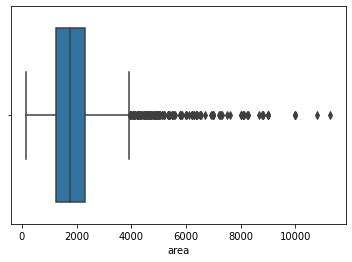

In [46]:
sns.boxplot(x=df['area'])

In [47]:
df['area'].describe()

count     3645.000000
mean      1943.335684
std       1207.845851
min        145.000000
25%       1255.000000
50%       1745.000000
75%       2321.000000
max      11286.000000
Name: area, dtype: float64

## Bedroom

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

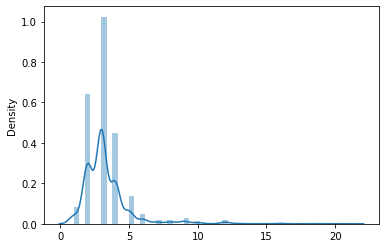

In [48]:
sns.distplot(x=df['bedRoom'])

<AxesSubplot: xlabel='bedRoom'>

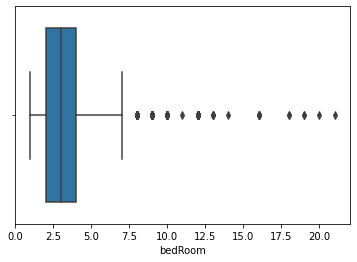

In [49]:
sns.boxplot(x=df['bedRoom'])

In [50]:
df['bedRoom'].describe()

count    3645.000000
mean        3.330041
std         1.829443
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [51]:
df[df['bedRoom'] > 10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,49.0,NaN
2611,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,22.0,NaN
78,house,independent,sector 17,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,68.0,NaN
1493,house,independent,sector 17,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,74.0,NaN
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,70.0,NaN
1381,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,2.0,57.0,NaN
3457,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,49.0,NaN
2137,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN
2096,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,31.0,NaN
2039,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,41.0,NaN


In [52]:
df = df[df['bedRoom'] <=10]

In [53]:
df.shape

(3600, 24)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='bedRoom', ylabel='Density'>

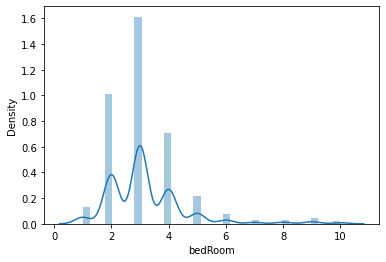

In [54]:
sns.distplot(df['bedRoom'])

<AxesSubplot: xlabel='bedRoom'>

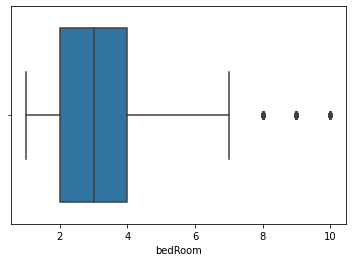

In [55]:
sns.boxplot(x=df['bedRoom'])

In [56]:
df['bedRoom'].describe()

count    3600.000000
mean        3.200556
std         1.394547
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

## Bathroom

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: ylabel='Density'>

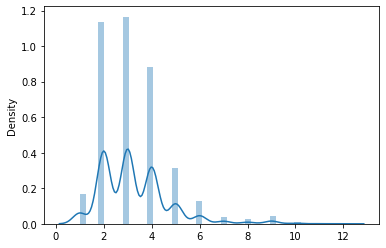

In [57]:
sns.distplot(x=df['bathroom'])

<AxesSubplot: xlabel='bathroom'>

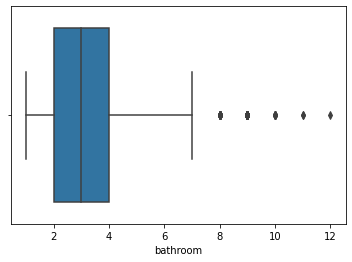

In [58]:
sns.boxplot(x=df['bathroom'])

In [59]:
df[df['bathroom'] > 10].sort_values('bathroom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,146.0,NaN
2771,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,38.0,NaN
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,39.0,NaN


In [60]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.00,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN
1,flat,smart world gems,sector 89,0.95,8600.0,1105.00,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,NaN
2,flat,pyramid elite,sector 86,0.46,79.0,681.41,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,681.41,581.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0,NaN
3,flat,breez global hill view,sohna road,0.32,5470.0,585.00,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,NaN
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.00,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,NaN


## Super built up Area

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='super_built_up_area', ylabel='Density'>

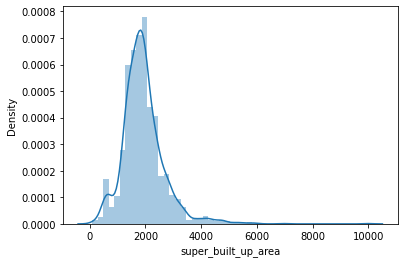

In [61]:
sns.distplot(df['super_built_up_area'])

In [62]:
df['super_built_up_area'] = pd.to_numeric(df['super_built_up_area'], errors='coerce')

<AxesSubplot: xlabel='super_built_up_area'>

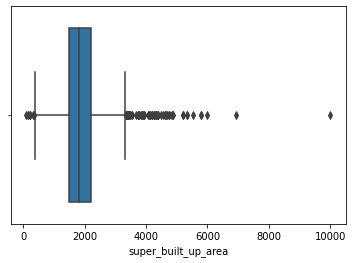

In [63]:
sns.boxplot(x=df['super_built_up_area'])

In [64]:
df['super_built_up_area'].describe()

count     1876.000000
mean      1925.362233
std        763.987434
min         89.000000
25%       1479.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [65]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,140.0,NaN
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,49.0,NaN


## built up area

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='built_up_area', ylabel='Density'>

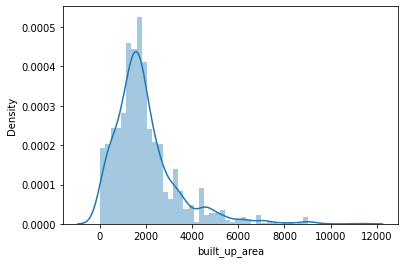

In [66]:
sns.distplot(df['built_up_area'])

In [67]:
df['built_up_area'] = pd.to_numeric(df['built_up_area'], errors='coerce')

<AxesSubplot: xlabel='built_up_area'>

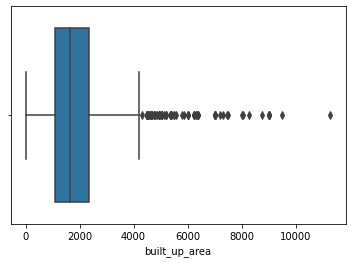

In [68]:
sns.boxplot(x = df['built_up_area'])

In [69]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
2834,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,42.0,NaN


## carpet Area

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='carpet_area', ylabel='Density'>

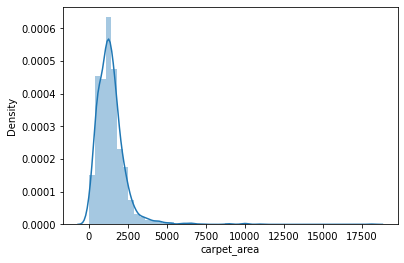

In [70]:
sns.distplot(df['carpet_area'])

In [71]:
df['carpet_area'] = pd.to_numeric(df['carpet_area'], errors='coerce')

<AxesSubplot: xlabel='carpet_area'>

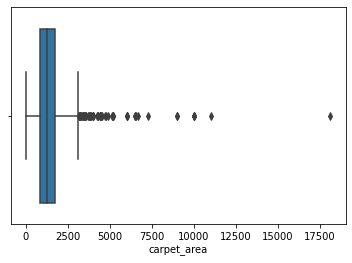

In [72]:
sns.boxplot(x = df['carpet_area'])

In [73]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
2131,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,1812.0,18122.0,1.0,0.0,0.0,1.0,1.0,1.0,44.0,NaN
2342,flat,m3m golfestate,sector 65,13.2,12000.0,4944.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,4944.0,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,NaN


In [74]:
df.loc[2131, ['carpet_area']] = 1812
df.loc[2342, ['carpet_area']] = 11000
df.loc[2342,['area']] = 11000


In [75]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
2342,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,4944.0,11000.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,NaN


In [76]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,carpet
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.00,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN
1,flat,smart world gems,sector 89,0.95,8600.0,1105.00,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0,NaN
2,flat,pyramid elite,sector 86,0.46,79.0,681.41,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,681.41,581.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0,NaN
3,flat,breez global hill view,sohna road,0.32,5470.0,585.00,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.00,585.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0,NaN
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.00,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.00,1476.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0,NaN


## Luxury Score

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='luxury_score', ylabel='Density'>

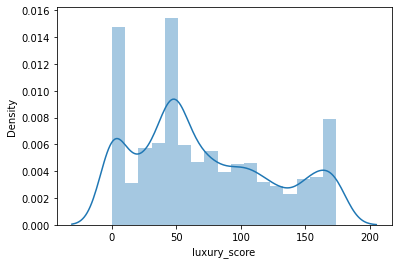

In [77]:
sns.distplot(df['luxury_score'])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='luxury_score'>

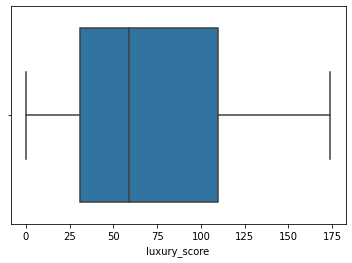

In [78]:
sns.boxplot(df['luxury_score'])

In [79]:
df.shape

(3600, 24)

In [91]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [92]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.00,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,1105.00,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,pyramid elite,sector 86,0.46,6751.0,681.41,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,681.41,581.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0
3,flat,breez global hill view,sohna road,0.32,5470.0,585.00,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.00,585.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.00,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.00,1476.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='price_per_sqft', ylabel='Density'>

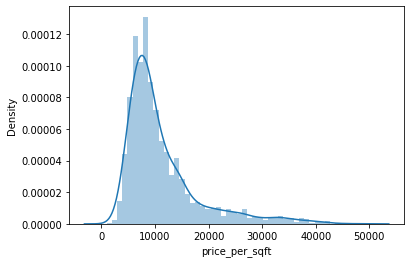

In [93]:
sns.distplot(df['price_per_sqft'])

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='price_per_sqft'>

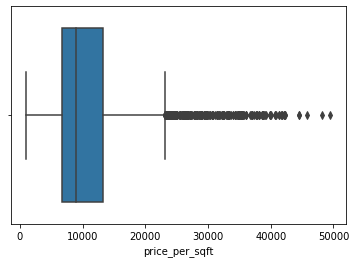

In [94]:
sns.boxplot(df['price_per_sqft'])

In [95]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
711,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,97.0
901,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,60.0
1090,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,1.0,44.0
1526,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,121.0
2040,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,1.0,88.0
2130,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,103.0
3054,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,7.0
3108,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0


In [85]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

250.5

In [98]:
x = df[(df['area']/df['bedRoom'])<250]

In [100]:
x.to_csv('areavbedroom.csv')

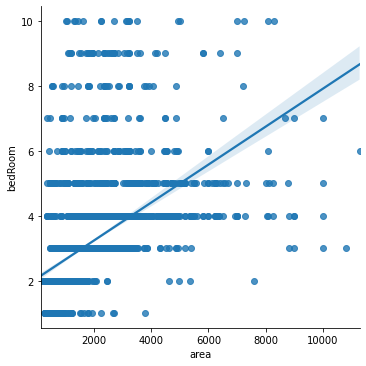

In [101]:
sns.lmplot(data= df, x='area', y='bedRoom')

In [102]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [105]:
df['area_room_ratio'].sort_values()

2784      51.428571
2300      64.285714
2360      67.500000
2047      67.500000
1562      72.000000
751       72.500000
1580      72.666667
1429      73.125000
1953      90.000000
229       90.000000
1737      90.000000
3774      90.000000
3268      90.000000
2721      90.000000
1696      90.000000
1997      90.750000
37        92.500000
1773      94.400000
247       95.400000
3306      95.400000
48       103.500000
852      106.500000
3309     108.000000
3069     112.500000
2173     112.500000
3633     113.000000
1224     118.833333
3364     120.000000
2806     120.000000
3797     120.000000
3148     120.600000
1049     121.500000
1509     125.000000
1627     126.000000
3347     128.000000
837      128.571429
3546     128.571429
2984     128.571429
186      130.000000
1532     134.500000
2313     135.000000
393      135.000000
1032     135.000000
2277     135.000000
935      135.000000
1798     135.000000
3328     135.000000
530      137.142857
3101     143.100000
1851     144.000000


In [107]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

2.0     47
3.0     34
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
10.0     8
7.0      8
Name: bedRoom, dtype: int64

In [108]:
df = df[df['area_room_ratio'] > 100]

In [109]:
outliers_df = df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 3)]

In [110]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-110-cc709567dc6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [111]:
df.update(outliers_df)

<ipython-input-111-4d8d90c3994e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(outliers_df)
<ipython-input-111-4d8d90c3994e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.update(outliers_df)
<ipython-input-111-4d8d90c3994e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [112]:
df['area_room_ratio'] = df['area']/df['bedRoom']

<ipython-input-112-5c374e3e5624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [114]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
93,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.000000
387,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166.666667
753,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,225.000000
1106,house,independent,sector 5,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5.0,3.0,3,1.0,NaN,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.000000
1206,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198.000000
1747,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9.0,5.0,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,8.0,200.000000
1936,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.000000
1939,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.750000
2806,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.000000
3148,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5.0,2.0,2,1.0,NaN,Old Property,NaN,67.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,29.0,120.600000


In [115]:
df[(df['area_room_ratio'] < 250) & (df['bedRoom'] > 4)].shape

(13, 24)

In [116]:
df.shape

(3580, 24)

In [120]:
df = df[~((df['area_room_ratio'] < 250) & (df['bedRoom'] > 4))]

In [121]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.00,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.00,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
2,flat,pyramid elite,sector 86,0.46,6751.0,681.41,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,681.41,581.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0,340.705000
3,flat,breez global hill view,sohna road,0.32,5470.0,585.00,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.00,585.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.00,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.00,1476.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000


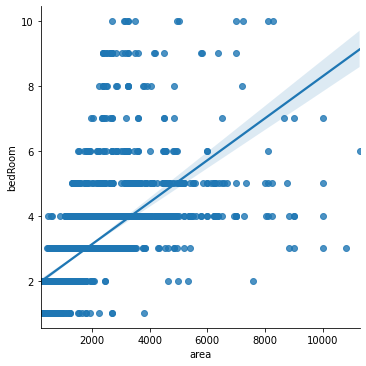

In [123]:
sns.lmplot(data=df, x = 'area', y='bedRoom')

In [124]:
df.shape

(3567, 24)

In [125]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.00,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.00,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.00,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
2,flat,pyramid elite,sector 86,0.46,6751.0,681.41,Carpet area: 58141 (5401.48 sq.m.),2.0,2.0,1,0.0,NaN,Under Construction,NaN,681.41,581.41,0.0,0.0,0.0,0.0,0.0,0.0,15.0,340.705000
3,flat,breez global hill view,sohna road,0.32,5470.0,585.00,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.00,585.00,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.00,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.00,1476.00,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000


In [126]:
df.to_csv('gurgaon_properties_outlier_treated.csv', index=False)